# Support Vector Regression

- As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM.

### Terminologies:

###### Kernel: 
- The function used to map a lower dimensional data into a higher dimensional data.

##### Hyperplane:
- In SVM this is basically the separation line between the data classes. Although in SVR we are going to define it as the line that will will help us predict the continuous value or target value.

##### Boundary Line:
- In SVM there are two lines other than Hyper Plane which creates a margin . The support vectors can be on the Boundary lines or outside it. This boundary line separates the two classes. In SVR the concept is same.

##### Support Vectors:
- This are the data points which are closest to the boundary. The distance of the points is minimum or least.

## Differences between SVR and Simple Regression:
- In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold.

<img src = 'svr.jpg' height = 250px width = 50%>


<i><mark>Our best fit line is the line hyperplane that has maximum number of points.
    <br>So the lines that we draw are at ‘+e’ and ‘-e ’ distance from Hyper Plane.
    </mark></i>
    

<img src = 'svr1.jpg' height = 200px width = 50% >

##### Thus the decision boundary is our Margin of tolerance that is We are going to take only those points who are within this boundary.
Or in simple terms that we are going to take only those those points which have least error rate. Thus giving us a better fitting model.

# Codes:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
os.chdir(r'C:\Users\acer\Desktop\P14-Machine-Learning-AZ-Template-Folder\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\P14-SVR\SVR')

In [18]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
# Creating dependent and independent variables.
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,2].values


In [20]:
X_mod = dataset['Level'].values
y_mod = dataset['Salary'].values

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

In [22]:
regressor.fit(X,y)

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred1 = regressor.predict(X)

In [24]:
np.abs(y_pred1 - y)

array([ 84998.6136814 ,  79998.24580218,  69998.22773336,  49998.26424123,
        19999.        ,  19999.        ,  69998.26424123, 169998.22773336,
       369998.24580218, 869998.6136814 ])

##### Too much error in prediction!
Let's see it in a plot visually.

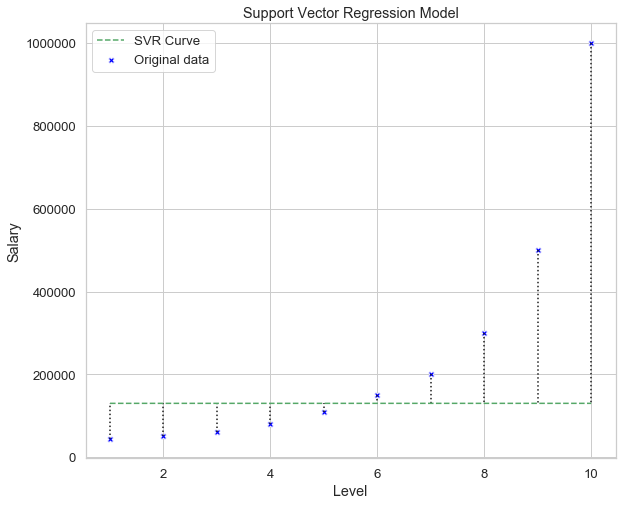

In [50]:
plt.figure(figsize = (9.5,8))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.scatterplot(x = dataset.Level, y = dataset.Salary, color = 'blue', marker = 'X', label = 'Original data')

#PLotting the curve predicted by 'regressor' object.
plt.plot(X, regressor.predict(X), 'g--', label = 'SVR Curve')


for ii in range(len(X)):
    plt.vlines(X[ii], y[ii], y_pred1[ii], linestyles = 'dotted')
    #plt.vlines(X_position, ymin, ymax)

plt.legend()
plt.title('Support Vector Regression Model')
plt.show()

##### The curve obtained is a straight line because we didn't scale the data properly.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_transformed = sc_X.fit_transform(X)
y_transformed = sc_y.fit_transform(y.reshape(-1,1))

#### Again, fitting the regressor into these variables.

In [34]:
regressor_new = SVR()
regressor_new.fit(X_transformed, y_transformed)
y_pred2 = regressor_new.predict(X_transformed)
y_pred2

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [55]:
X_transformed

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [56]:
y_transformed

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [57]:
y_pred2

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

### Visualization

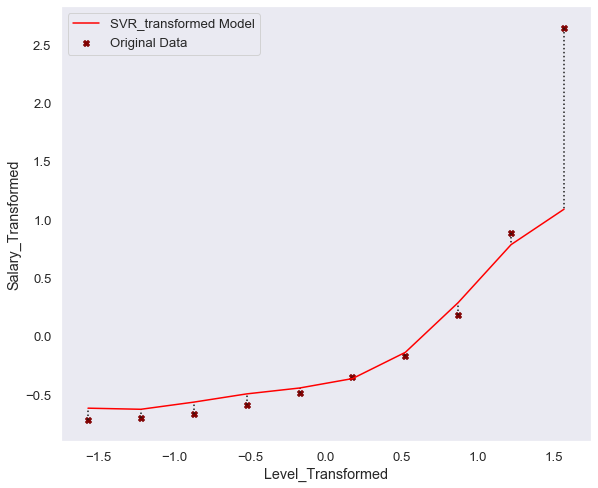

In [54]:
plt.figure(figsize = (9.5,8))
sns.set(style = 'darkgrid', font_scale = 1.2)

plt.plot(X_transformed, y_pred2, label = 'SVR_transformed Model', color = 'red')
plt.scatter(X_transformed,y_transformed, marker = 'X', color = 'maroon', label = 'Original Data')
for ii in range(len(X)):
    plt.vlines(X_transformed[ii][0], y_transformed[ii][0], y_pred2[ii], linestyles = 'dotted')
    #plt.vlines(X_position, ymin, ymax)
    
plt.xlabel('Level_Transformed')
plt.ylabel('Salary_Transformed')
plt.legend()
plt.grid(False)
plt.show()

In [63]:
prediction = regressor_new.predict(sc_X.fit_transform( np.array([[6.5]])))
prediction

array([-0.41686141])

##### This is a scaled value.
##### We need to "Inverse Transform" this value.

In [64]:
unscaled_prediction = sc_y.inverse_transform(prediction)
unscaled_prediction

array([131106.77303274])

### Using Function to do this.

In [66]:
def prediction(X_val):
    temp_pred = regressor_new.predict( sc_X.fit_transform( np.array([[X_val]])))
    return sc_y.inverse_transform(temp_pred)

prediction(6.5)

array([131106.77303274])

# The End.